In [2]:
import numpy as np
import mne
from pathlib import Path
import neural_mi as nmi
import os
import torch
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
os.environ["NMI_DISABLE_CACHE"] = "1"   # disable caching
os.environ["NMI_CACHE_DIR"] = "./tmp"   # small local dir

In [13]:
import numpy as np
import mne
from pathlib import Path

# ----------------- CONFIG ----------------- #
DATA_FOLDER = Path("../data/raw/P1-20251027T182958Z-1-001/P1/")
OUT_AUD_FILE = Path("../data/processed/P1_all_subjects_concat_auditory.npy")
OUT_TAC_FILE = Path("../data/processed/P1_all_subjects_concat_tactile.npy")

SUBJECT_IDS = [x for x in range(2, 18) if x not in (4, 14)]
SET_TEMPLATE = "binepochs filtered ICArej P1AvgBOS{num}.set"

APPLY_BANDPASS = True
BANDPASS = (1.0, 30.0)
ZSCORE_PER_EPOCH = True
BASELINE = (None, 0.0)
# ------------------------------------------ #

def process_epochs(epochs):
    """Applies baseline, filtering, and z-scoring, then concatenates epochs."""
    data = epochs.get_data()  # (n_epochs, n_channels, n_times)
    sfreq = epochs.info['sfreq']

    if APPLY_BANDPASS:
        for e in range(len(data)):
            data[e] = mne.filter.filter_data(
                data[e], sfreq,
                l_freq=BANDPASS[0],
                h_freq=BANDPASS[1],
                verbose=False
            )

    for e in range(len(data)):
        means = data[e].mean(axis=1, keepdims=True)
        stds = data[e].std(axis=1, keepdims=True)
        stds[stds == 0] = 1.0
        data[e] = (data[e] - means) / stds

    # Concatenate all epochs in time
    concat = data.transpose(1, 0, 2).reshape(data.shape[1], -1)
    return concat


# ------------- MAIN LOOP ------------- #
auditory_all = []
tactile_all = []
common_ch_names = None

for subj in SUBJECT_IDS:
    fname = SET_TEMPLATE.format(num=subj)
    set_path = DATA_FOLDER / fname
    if not set_path.exists():
        print(f"Skipping missing subject {subj}")
        continue

    print(f"Processing subject {subj}...")

    epochs = mne.io.read_epochs_eeglab(set_path)
    if BASELINE is not None:
        epochs.apply_baseline(BASELINE)

    # Split by stimulus type
    auditory_epochs = epochs[::2]
    tactile_epochs = epochs[1::2]

    auditory_concat = process_epochs(auditory_epochs)
    tactile_concat = process_epochs(tactile_epochs)

    if common_ch_names is None:
        common_ch_names = epochs.ch_names
    else:
        assert epochs.ch_names == common_ch_names, f"Channel mismatch in subject {subj}!"

    auditory_all.append(auditory_concat)
    tactile_all.append(tactile_concat)

# --- Stack all subjects ---
auditory_grand = np.concatenate(auditory_all, axis=1)
tactile_grand = np.concatenate(tactile_all, axis=1)

print(f"Auditory grand shape: {auditory_grand.shape}")
print(f"Tactile grand shape:  {tactile_grand.shape}")

# --- Save ---
np.save(OUT_AUD_FILE, auditory_grand)
np.save(OUT_TAC_FILE, tactile_grand)

print(f"Saved auditory data to {OUT_AUD_FILE}")
print(f"Saved tactile data to  {OUT_TAC_FILE}")

Processing subject 2...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS2.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 3...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS3.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 5...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS5.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 6...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS6.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 7...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS7.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 8...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS8.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 9...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS9.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 10...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS10.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 11...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS11.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 12...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS12.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 13...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS13.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 15...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS15.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 16...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS16.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Processing subject 17...
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS17.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying baseline correction (mode: mean)


C:\Users\Rinta\AppData\Local\Temp\ipykernel_25344\1770058871.py:58: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(set_path)


Auditory grand shape: (32, 1505280)
Tactile grand shape:  (32, 1505280)
Saved auditory data to ..\data\processed\P1_all_subjects_concat_auditory.npy
Saved tactile data to  ..\data\processed\P1_all_subjects_concat_tactile.npy


In [4]:
data = np.load("../data/processed/P1_all_subjects_concat_auditory.npy")
print(data.shape)

data_path = Path("../data/raw/P1-20251027T182958Z-1-001/P1/")
file_path = data_path / "binepochs filtered ICArej P1AvgBOS2.set"
epochs = mne.io.read_epochs_eeglab(file_path)

(32, 1505280)
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS2.set...
Not setting metadata
120 matching events found


C:\Users\Rinta\AppData\Local\Temp\ipykernel_17780\552096916.py:6: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(file_path)


No baseline correction applied
0 projection items activated
Ready.


In [37]:
ch_names = epochs.ch_names
sel = [ch_names.index(ch) for ch in ['C3', 'T7']]
selected_1 = data[sel, :]
x = selected_1[0, :100_000].reshape(1, -1)
y = selected_1[1, :100_000].reshape(1, -1)
print(selected_1[0].reshape(1,-1).shape)

(1, 1505280)


x: (1, 100000) y: (1, 100000)
Overlap correlation: 0.3062875761937443


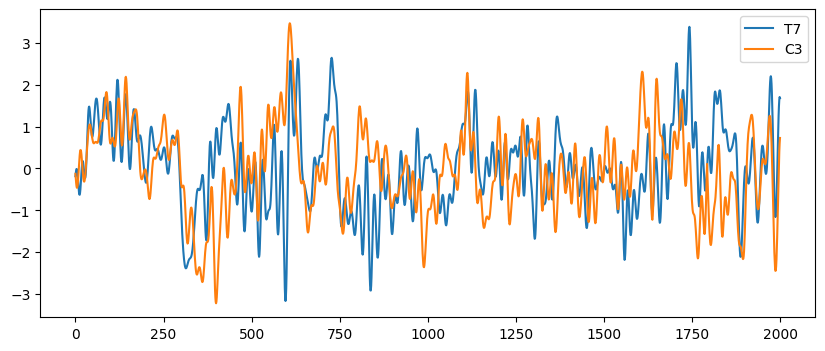

In [38]:
import numpy as np

print("x:", x.shape, "y:", y.shape)
print("Overlap correlation:", np.corrcoef(x.flatten(), y.flatten())[0,1])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(x[0, :2000], label='T7')
plt.plot(y[0, :2000], label='C3')
plt.legend()
plt.show()


In [27]:
SWEEP_GRID = {'critic_type': ['separable'], 'run_id': range(2)}

BASE_PARAMS = {
    'n_epochs': 30,
    'learning_rate': 1e-3,
    'batch_size': 32,
    'embedding_dim': 8,
    'hidden_dim': 32,
    'n_layers': 2,
    'patience': 20, # consider increasing patience for real analyses
}

In [29]:
# Clear cuda cache
torch.cuda.empty_cache()

In [28]:
results = nmi.run(
    x_data=x,
    y_data=y,
    mode='lag',
    processor_type_x='continuous',
    processor_type_y='continuous',
    processor_params={'window_size': 500},
    base_params=BASE_PARAMS,
    sweep_grid=SWEEP_GRID,
    lag_range=range(-100, 101, 20),
    n_workers=1,
)

2025-11-03 15:46:42 - neural_mi - WARNING - `processor_params` is deprecated. Use `processor_params_x` and `processor_params_y` instead.
2025-11-03 15:46:42 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-03 15:46:42 - neural_mi - INFO - Preparing 22 tasks for lag analysis.
2025-11-03 15:46:42 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/22 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 58.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.42 GiB is allocated by PyTorch, and 23.89 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

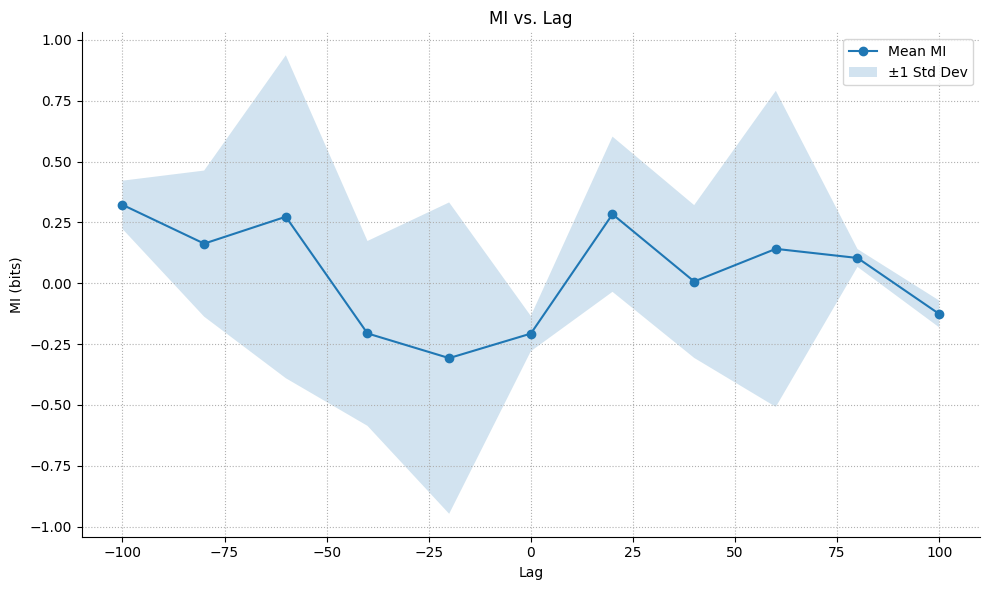

In [12]:
ax = results.plot(show=True)

In [8]:
lag_range = range(-100, 101, 20)
window_range = list(range(225, 550, 25))
mi_results_2d = []

print("Starting 2D sweep...")
for lag in tqdm(lag_range, desc="Lag Sweep Progress"):
    results = nmi.run(
        x_data=x,
        y_data=y,
        mode='sweep',
        processor_type_x='continuous',
        processor_type_y='continuous',
        processor_params_x={},
        processor_params_y={},
        base_params=BASE_PARAMS,
        sweep_grid={'window_size': window_range},
        n_workers=2,
        verbose=False
    )

    for _, row in results.dataframe.iterrows():
        mi_results_2d.append({
            'lag': lag, 
            'window_size': row['window_size'],
            'mi': row['mi_mean']
        })

print("2D sweep complete!")
results_df_2d = pd.DataFrame(mi_results_2d)

Starting 2D sweep...


Lag Sweep Progress:   0%|          | 0/11 [00:00<?, ?it/s]

2025-11-01 13:27:54 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 13:27:54 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 13:55:57 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 13:55:58 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 13:55:58 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 14:23:08 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 14:23:08 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 14:23:08 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 14:48:49 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 14:48:49 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 14:48:49 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 15:13:01 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 15:13:01 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 15:13:01 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 15:37:18 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 15:37:18 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 15:37:18 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 16:01:07 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 16:01:07 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 16:01:07 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 16:26:32 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 16:26:32 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 16:26:32 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 16:52:35 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 16:52:35 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 16:52:35 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 17:19:42 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 17:19:42 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 17:19:42 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 17:44:52 - neural_mi - INFO - Parameter sweep finished.
2025-11-01 17:44:52 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-11-01 17:44:52 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/13 [00:00<?, ?task/s]

2025-11-01 18:09:48 - neural_mi - INFO - Parameter sweep finished.
2D sweep complete!


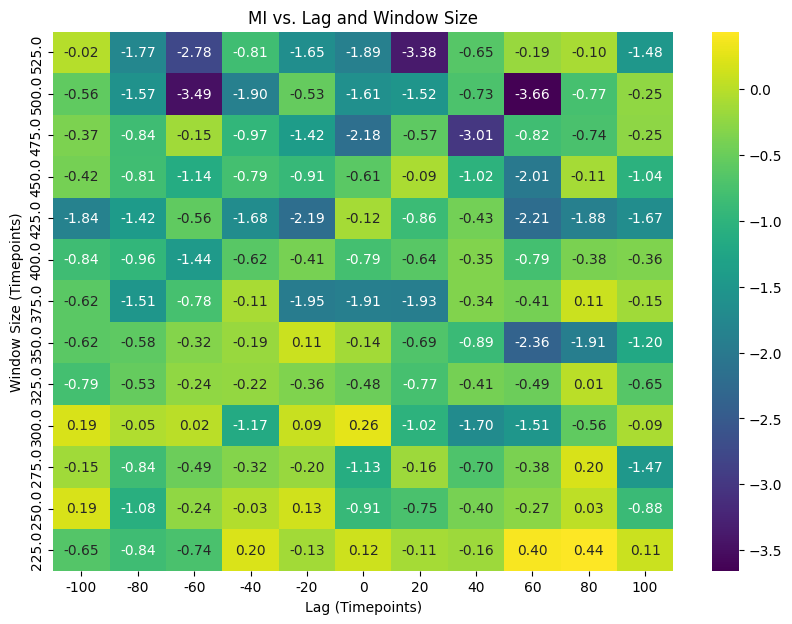

In [9]:
# Pivot the data for the heatmap
heatmap_data = results_df_2d.pivot(index='window_size', columns='lag', values='mi')

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('MI vs. Lag and Window Size')
plt.xlabel('Lag (Timepoints)')
plt.ylabel('Window Size (Timepoints)')
plt.gca().invert_yaxis()
plt.show()

In [14]:
sweep_grid = {
    'critic_type': ['separable', 'bilinear', 'concat'],
    'run_id': range(5) # Average over 5 runs for stability
}

base_params = {
    'n_epochs': 100, 'learning_rate': 5e-4, 'batch_size': 64,
    'patience': 20, 'embedding_dim': 8, 'hidden_dim': 64, 'n_layers': 3
}

# Run lag analysis with window fixed at 500ms comparing separable vs. bilinear critic types, using cnn embedding model
# Sanity check with x vs. x
results_1 = nmi.run(
    x_data=x,
    y_data=x,
    mode='sweep', 
    processor_type_x='continuous',
    processor_type_y='continuous',
    processor_params={'window_size': 1000},
    base_params=base_params,
    sweep_grid=sweep_grid,
    lag_range=range(-400, 400, 20),
    n_workers=1
)

2025-11-03 15:30:52 - neural_mi - WARNING - `processor_params` is deprecated. Use `processor_params_x` and `processor_params_y` instead.
2025-11-03 15:30:52 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/15 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c0:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c1:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c2:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c3:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c4:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c5:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c6:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c7:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c8:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c9:   0%|          | 0/100 [00:00<?, ?it/s]

Run 80eb3b4e-2d0c-418a-8ff7-31b98a86b980_c10:   0%|          | 0/100 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 198.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.42 GiB is allocated by PyTorch, and 24.03 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

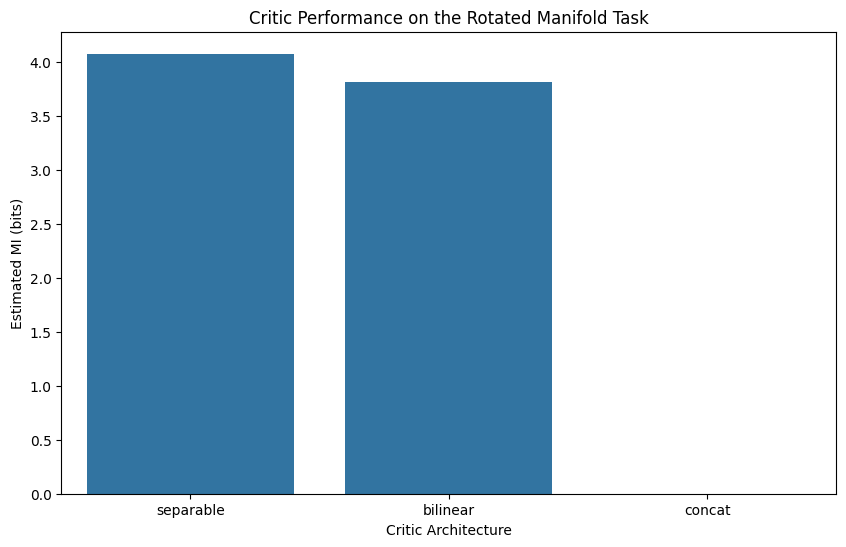

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_1.dataframe, x='critic_type', y='mi_mean', capsize=0.1, order=['separable', 'bilinear', 'concat'])
plt.title('Critic Performance on the Rotated Manifold Task')
plt.ylabel('Estimated MI (bits)')
plt.xlabel('Critic Architecture')
plt.ylim(bottom=0)
plt.show()